In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralCoclustering

In [2]:
whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")

In [3]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [4]:
# Rows 5 to 9, columns 0 to 4
whisky.iloc[5:10, 0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [5]:
flavors = whisky.iloc[:, 2:14]
flavors.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


In [6]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375


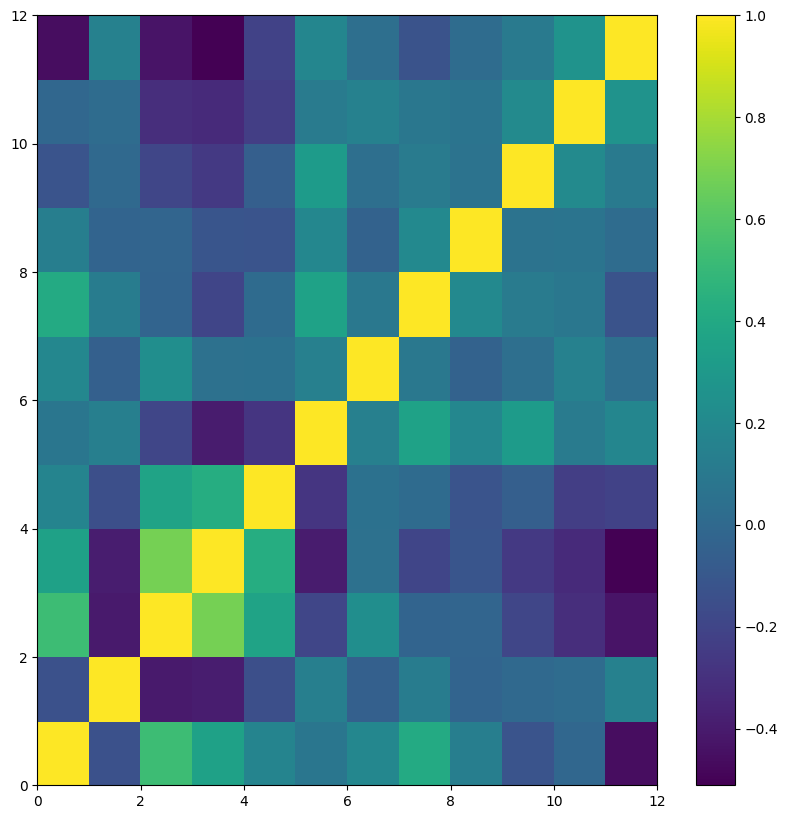

In [7]:
plt.figure(figsize=(10, 10))
plt.pcolor(corr_flavors)
plt.colorbar();

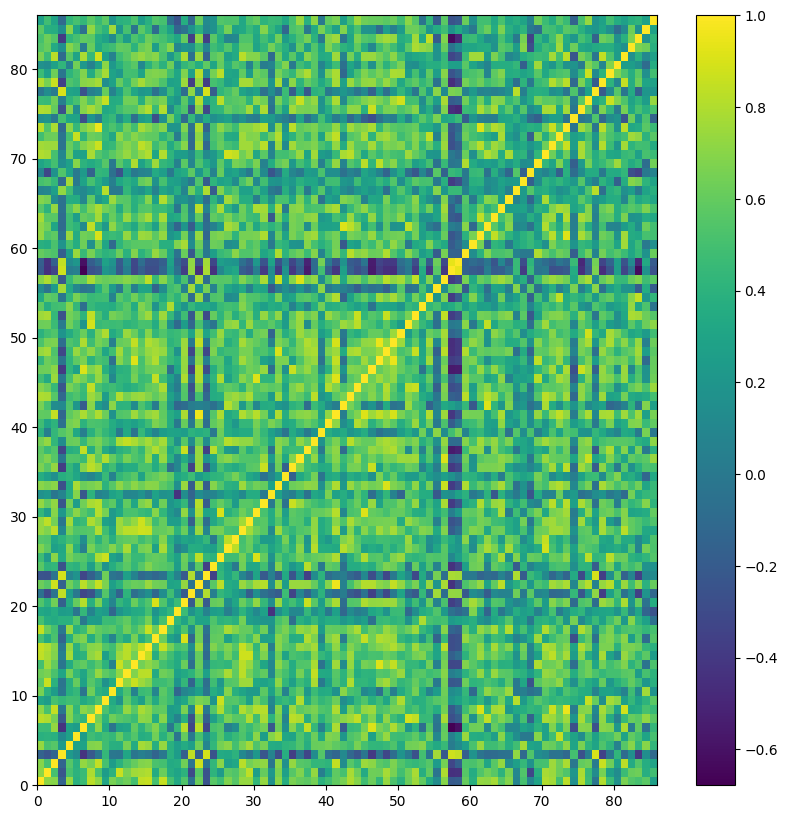

In [8]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())

plt.figure(figsize=(10, 10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar();

In [9]:
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
        False, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False,  True,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

In [10]:
np.sum(model.rows_, axis=1)

array([19,  5, 24, 18, 14,  6])

In [11]:
#It says to which cluster each observation belongs: observation 1 to cluster 2, etc.
model.row_labels_

array([2, 2, 4, 5, 2, 0, 3, 2, 4, 3, 2, 0, 2, 0, 4, 4, 3, 2, 0, 1, 3, 5,
       3, 5, 3, 3, 2, 2, 3, 2, 3, 4, 0, 0, 0, 4, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 3, 4, 0, 0, 3, 3, 2, 2, 2, 0, 1, 2, 5, 5, 0, 3, 4, 2, 4, 3, 2,
       1, 2, 1, 0, 2, 4, 0, 4, 2, 4, 3, 5, 4, 3, 0, 4, 0, 0, 2, 0],
      dtype=int32)

In [12]:
# Extract the group labels from the model and append them to the whisky table, and specify the index
whisky["Group"] = pd.Series(model.row_labels_, index = whisky.index)

# Reorder the rows in increasing order by group labels. .ix has been removed. Use .loc instead
whisky = whisky.loc[np.argsort(model.row_labels_)]

#Reset the index of the dataframe
whisky = whisky.reset_index(drop= True)

correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())
correlations = np.array(correlations)

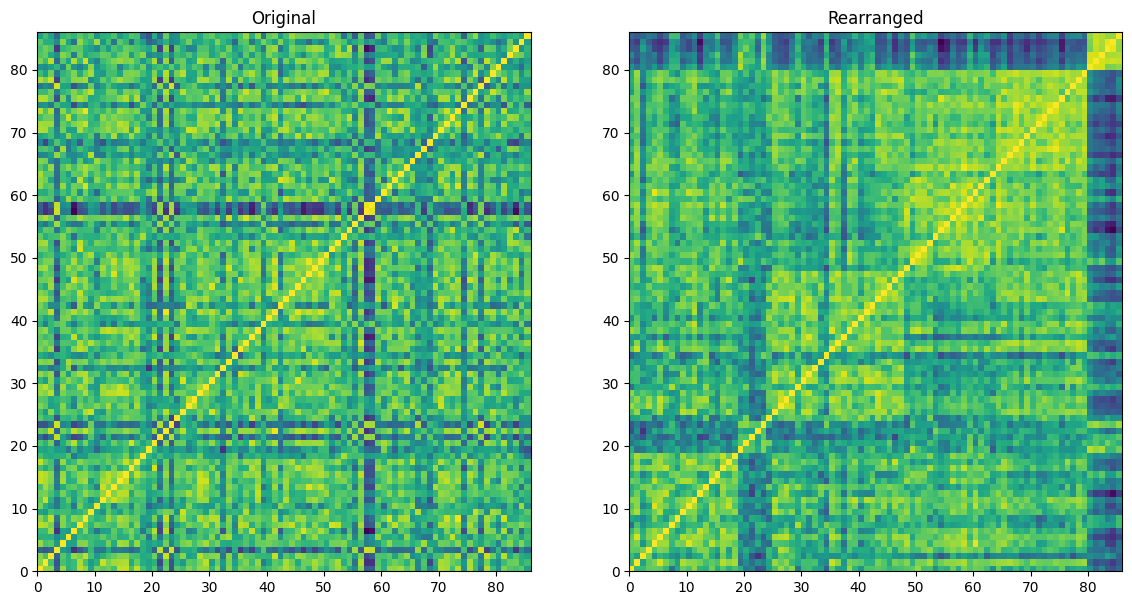

In [13]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight");

In [14]:
data = pd.Series([1,2,3,4])
data = data.loc[[3,0,1,2]]

In [15]:
data[0]

1

In [16]:
data = data.reset_index(drop=True)
data[0]

4